In [1]:
import numpy as np
import  matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap

In [41]:
ds=xr.open_dataset("./diag_viirs_npp_aod_2023093018.nc")

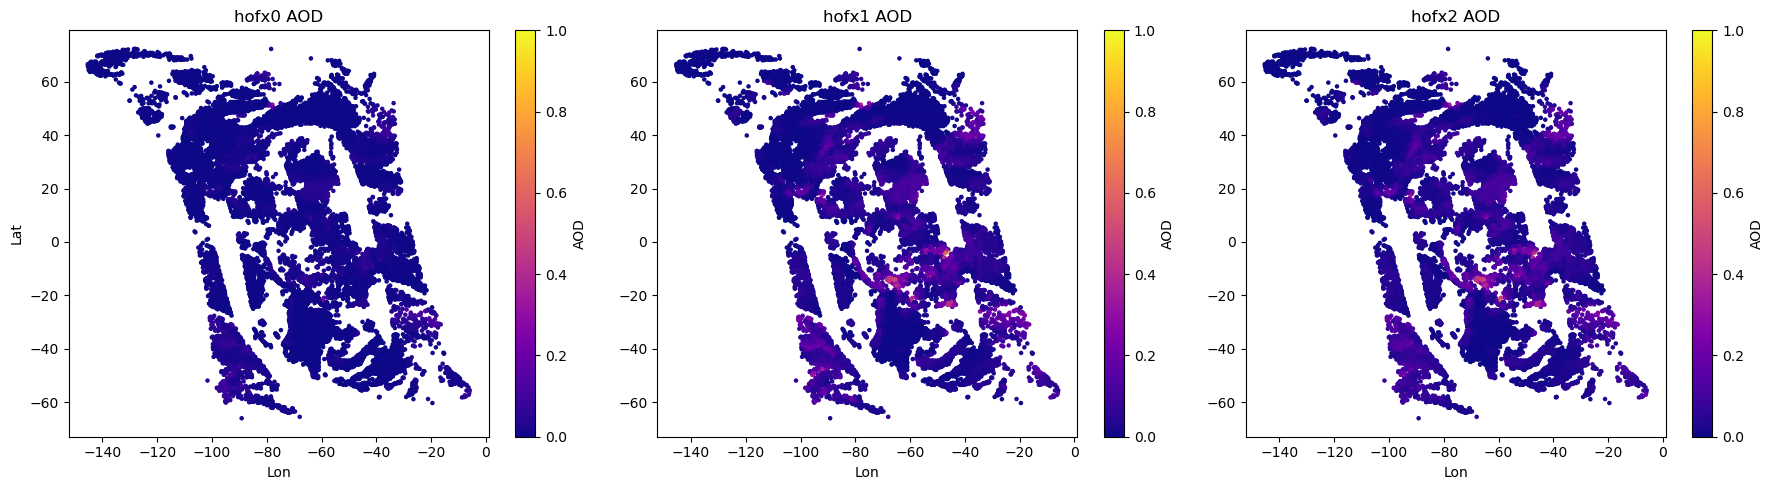

In [8]:
import xarray as xr
import matplotlib.pyplot as plt

# File path
file = "diag_viirs_npp_aod_2023093018.nc"

# Load AOD H(x)
hofx0 = xr.open_dataset(file, group="hofx0")['aerosolOpticalDepth']
hofx1 = xr.open_dataset(file, group="hofx1")['aerosolOpticalDepth']
hofx2 = xr.open_dataset(file, group="hofx2")['aerosolOpticalDepth']

# Load lat/lon
meta = xr.open_dataset(file, group="MetaData")
lat = meta['latitude']
lon = meta['longitude']

# Extract _FillValue from encoding
fill = hofx0.encoding.get('_FillValue', -3.3687953e+38)

# Create valid mask
valid = hofx0[:, 0] != fill

# Plot
plt.figure(figsize=(18, 5))

# hofx0
plt.subplot(1, 3, 1)
plt.scatter(lon[valid], lat[valid], c=hofx0[valid, 0], cmap='plasma', s=5, vmin=0, vmax=1)
plt.title('hofx0 AOD')
plt.colorbar(label='AOD')
plt.xlabel('Lon')
plt.ylabel('Lat')

# hofx1
plt.subplot(1, 3, 2)
plt.scatter(lon[valid], lat[valid], c=hofx1[valid, 0], cmap='plasma', s=5, vmin=0, vmax=1)
plt.title('hofx1 AOD')
plt.colorbar(label='AOD')
plt.xlabel('Lon')

# hofx2
plt.subplot(1, 3, 3)
plt.scatter(lon[valid], lat[valid], c=hofx2[valid, 0], cmap='plasma', s=5, vmin=0, vmax=1)
plt.title('hofx2 AOD')
plt.colorbar(label='AOD')
plt.xlabel('Lon')

plt.tight_layout()
plt.show()

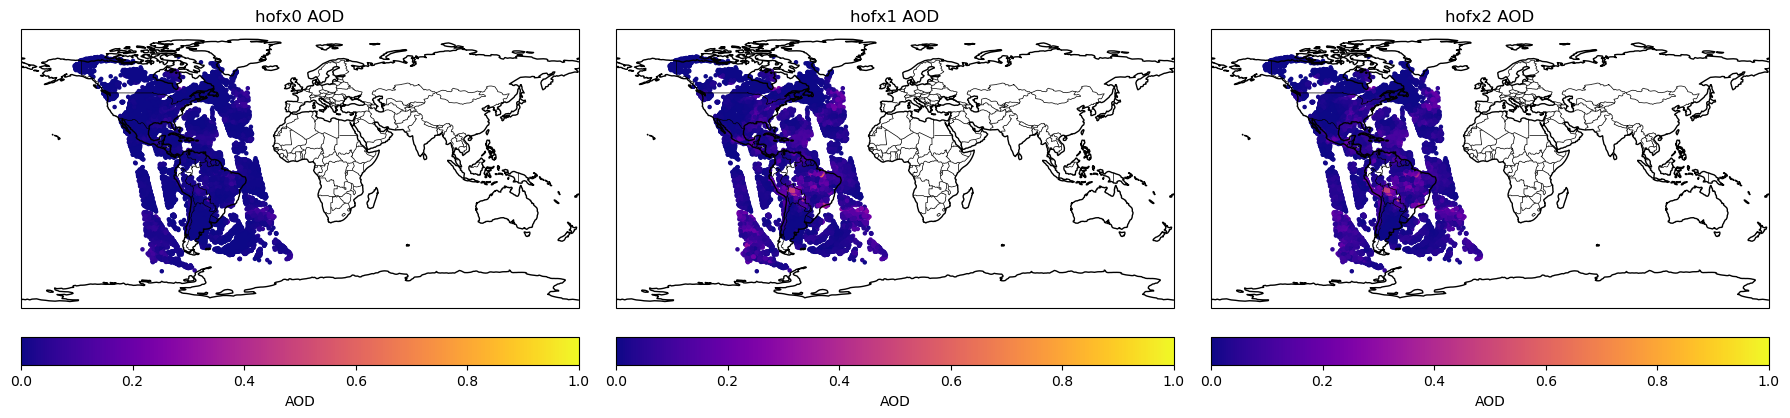

In [40]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the file
file = "diag_viirs_npp_aod_2023093018.nc"
hofx0 = xr.open_dataset(file, group="hofx0")['aerosolOpticalDepth']
hofx1 = xr.open_dataset(file, group="hofx1")['aerosolOpticalDepth']
hofx2 = xr.open_dataset(file, group="hofx2")['aerosolOpticalDepth']
meta = xr.open_dataset(file, group="MetaData")
lat = meta['latitude']
lon = meta['longitude']

# Remove invalid values
fill = hofx0.encoding.get('_FillValue', -3.3687953e+38)
valid = hofx0[:, 0] != fill
lat_valid = lat.values[valid]
lon_valid = lon.values[valid]
aod0 = hofx0.values[valid, 0]
aod1 = hofx1.values[valid, 0]
aod2 = hofx2.values[valid, 0]

# Set projection
proj = ccrs.PlateCarree()

# Create plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': proj})
titles = ['hofx0 AOD', 'hofx1 AOD', 'hofx2 AOD']
data = [aod0, aod1, aod2]

for ax, title, aod in zip(axs, titles, data):
    ax.set_title(title)
    ax.set_global()
    ax.coastlines(resolution='110m')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    sc = ax.scatter(lon_valid, lat_valid, c=aod, s=5, cmap='plasma', vmin=0, vmax=1,
                    transform=proj)
    plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='AOD')

plt.tight_layout()
plt.savefig('./hofx.png')
plt.show()

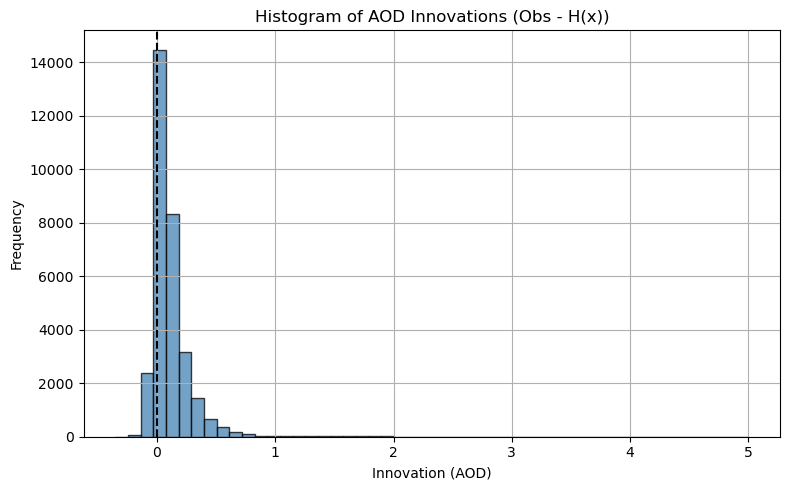

In [42]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Load the file
file_path = "diag_viirs_npp_aod_2023093018.nc"
ds = nc.Dataset(file_path, 'r')

# Read innovations
innov = ds.groups['innov1'].variables['aerosolOpticalDepth'][:]
fill = ds.groups['innov1'].variables['aerosolOpticalDepth']._FillValue

# Mask fill values
innov = np.ma.masked_where(innov == fill, innov)

# Flatten to 1D array
innov_flat = innov.compressed()  # removes masked (i.e., fill) values

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(innov_flat, bins=50, color='steelblue', edgecolor='black', alpha=0.75)
plt.axvline(0, color='k', linestyle='--')
plt.title('Histogram of AOD Innovations (Obs - H(x))')
plt.xlabel('Innovation (AOD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.savefig('./histinno.png')
plt.show()

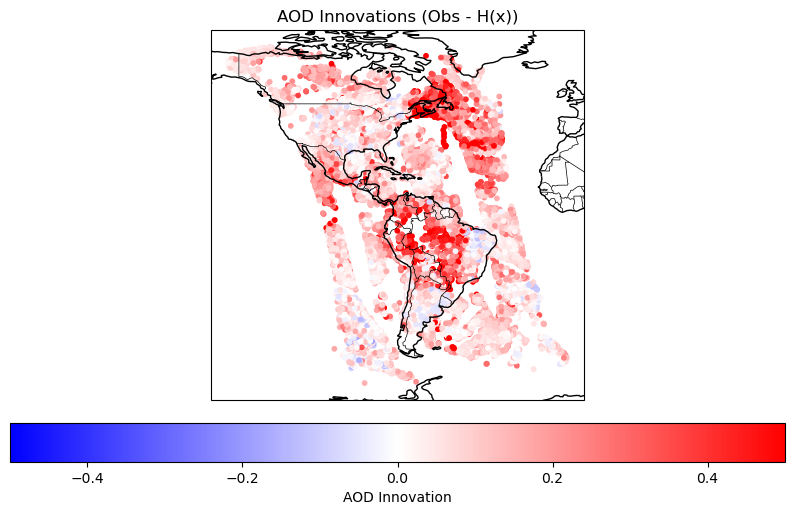

In [24]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

file = "diag_viirs_npp_aod_2023093018.nc"

# Load innovation data
innov = xr.open_dataset(file, group="innov1")['aerosolOpticalDepth']

# Load lat/lon
meta = xr.open_dataset(file, group="MetaData")
lat = meta['latitude']
lon = meta['longitude']

fill = innov.encoding.get('_FillValue', -3.368795e+38)
valid = innov[:, 0] != fill

lat_valid = lat.values[valid]
lon_valid = lon.values[valid]
innov_vals = innov.values[valid, 0]

# Set projection
proj = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj})
sc = ax.scatter(lon_valid, lat_valid, c=innov_vals, s=10, cmap='bwr', vmin=-0.5, vmax=0.5, transform=proj)
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_title("AOD Innovations (Obs - H(x))")
plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, label='AOD Innovation')
plt.savefig('./inovation.png')
plt.show()

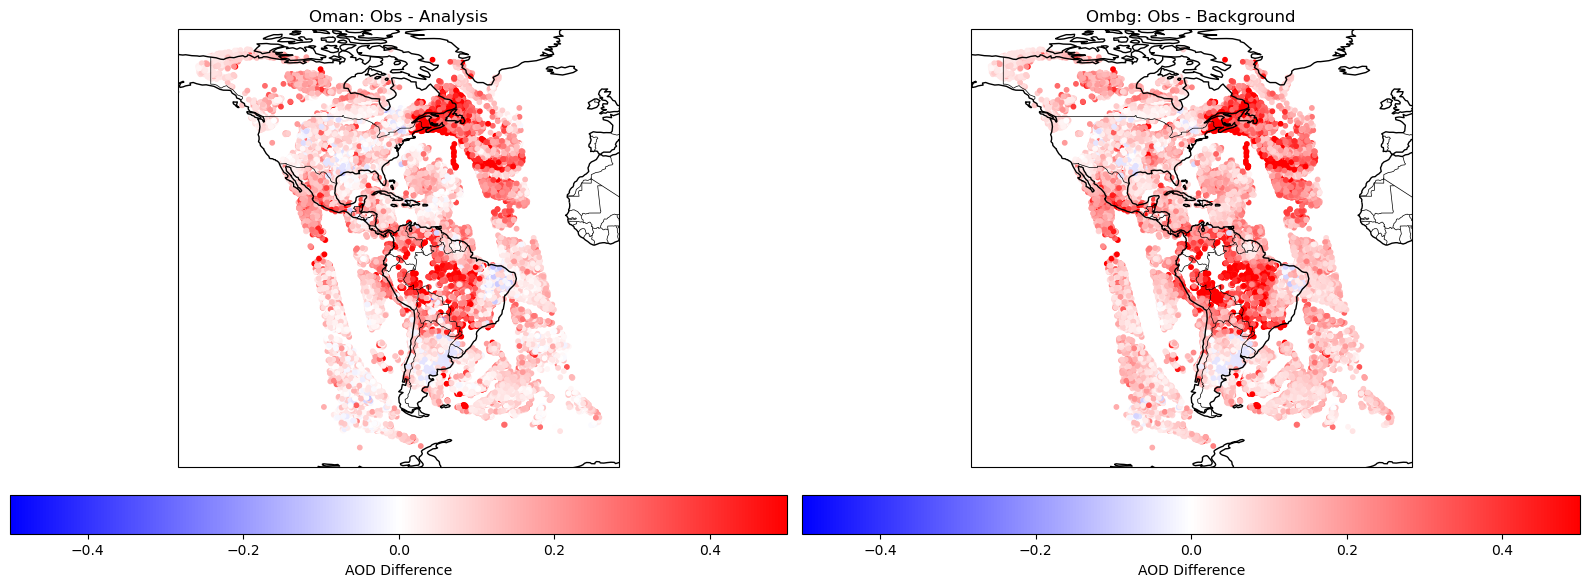

In [26]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

file = "diag_viirs_npp_aod_2023093018.nc"

# Load oman and ombg groups
oman = xr.open_dataset(file, group="oman")['aerosolOpticalDepth']
ombg = xr.open_dataset(file, group="ombg")['aerosolOpticalDepth']

# Load lat/lon
meta = xr.open_dataset(file, group="MetaData")
lat = meta['latitude']
lon = meta['longitude']

# Get fill value and mask invalid points
fill_oman = oman.encoding.get('_FillValue', -3.368795e+38)
fill_ombg = ombg.encoding.get('_FillValue', -3.368795e+38)

valid_oman = oman[:, 0] != fill_oman
valid_ombg = ombg[:, 0] != fill_ombg

# For plotting, take points valid in both
valid = valid_oman & valid_ombg

lat_valid = lat.values[valid]
lon_valid = lon.values[valid]
oman_vals = oman.values[valid, 0]
ombg_vals = ombg.values[valid, 0]

proj = ccrs.PlateCarree()

fig, axs = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={'projection': proj})

# Oman plot
sc1 = axs[0].scatter(lon_valid, lat_valid, c=oman_vals, s=10, cmap='bwr', vmin=-0.5, vmax=0.5, transform=proj)
axs[0].coastlines(resolution='110m')
axs[0].add_feature(cfeature.BORDERS, linewidth=0.5)
axs[0].set_title('Oman: Obs - Analysis')
plt.colorbar(sc1, ax=axs[0], orientation='horizontal', pad=0.05, label='AOD Difference')

# Ombg plot
sc2 = axs[1].scatter(lon_valid, lat_valid, c=ombg_vals, s=10, cmap='bwr', vmin=-0.5, vmax=0.5, transform=proj)
axs[1].coastlines(resolution='110m')
axs[1].add_feature(cfeature.BORDERS, linewidth=0.5)
axs[1].set_title('Ombg: Obs - Background')
plt.colorbar(sc2, ax=axs[1], orientation='horizontal', pad=0.05, label='AOD Difference')

plt.tight_layout()
plt.savefig('./diff.png')
plt.show()

In [15]:
import numpy as np

diff = oman.values[valid, 0] - ombg.values[valid, 0]
print(f"Max difference between oman and ombg: {np.max(np.abs(diff))}")
print(f"Mean difference between oman and ombg: {np.mean(diff)}")

Max difference between oman and ombg: 0.8514599800109863
Mean difference between oman and ombg: -0.030419642105698586


In [16]:
analysis = xr.open_dataset(file, group="hofx1")['aerosolOpticalDepth'].values[valid, 0]
background = xr.open_dataset(file, group="hofx0")['aerosolOpticalDepth'].values[valid, 0]

increment = analysis - background
print(f"Max increment: {np.max(np.abs(increment))}")
print(f"Mean increment: {np.mean(increment)}")

Max increment: 0.8484249114990234
Mean increment: 0.02996881492435932


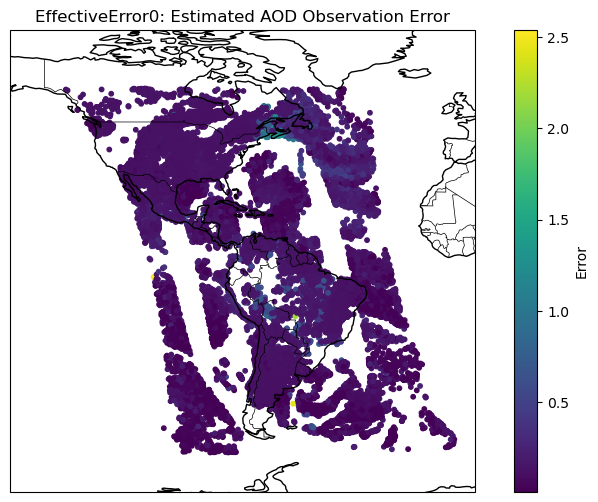

In [27]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

file = "diag_viirs_npp_aod_2023093018.nc"

error0 = xr.open_dataset(file, group="EffectiveError0")['aerosolOpticalDepth']
meta = xr.open_dataset(file, group="MetaData")
lat = meta['latitude']
lon = meta['longitude']

fill = error0.encoding.get('_FillValue', -3.368795e+38)
valid = error0[:, 0] != fill

proj = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj})
sc = ax.scatter(lon.values[valid], lat.values[valid], c=error0.values[valid, 0], s=10,
                cmap='viridis', transform=proj)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_title('EffectiveError0: Estimated AOD Observation Error')
plt.colorbar(sc, ax=ax, label='Error')
plt.savefig('./obserror.png')
plt.show()

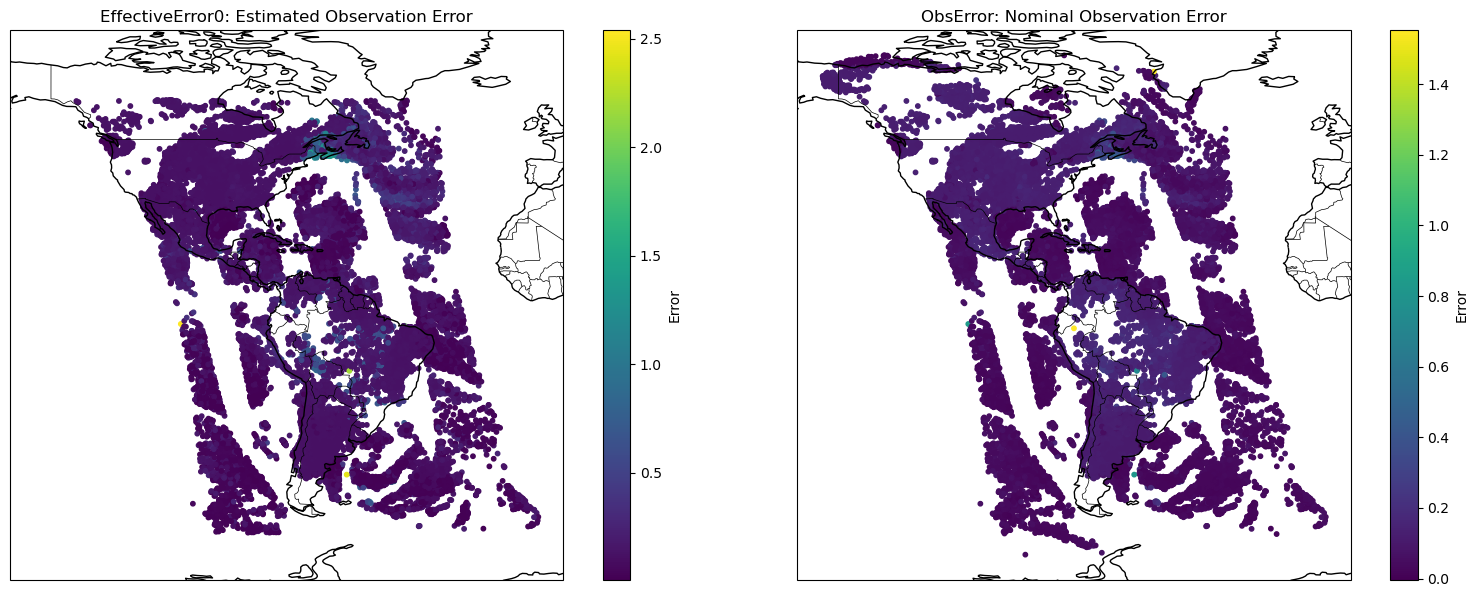

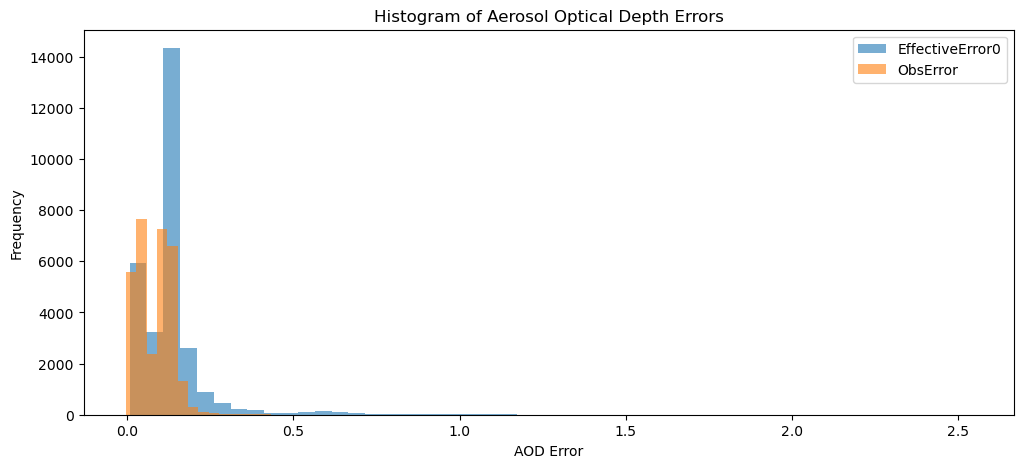

EffectiveError0 statistics:
  Mean: nan, Std: nan, Min: nan, Max: nan
ObsError statistics:
  Mean: 0.0847, Std: 0.0547, Min: -0.0032, Max: 1.5528


In [39]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

file = "diag_viirs_npp_aod_2023093018.nc"

# Load datasets
error0 = xr.open_dataset(file, group="EffectiveError0")['aerosolOpticalDepth']
obserr = xr.open_dataset(file, group="ObsError")['aerosolOpticalDepth']
meta = xr.open_dataset(file, group="MetaData")
lat = meta['latitude']
lon = meta['longitude']

# Get fill values
fill_error0 = error0.encoding.get('_FillValue', -3.368795e+38)
fill_obserr = obserr.encoding.get('_FillValue', -3.368795e+38)

# Mask valid points common to both
valid = (error0[:, 0] != fill_error0) & (obserr[:, 0] != fill_obserr)

lat_valid = lat.values[valid]
lon_valid = lon.values[valid]
error0_vals = error0.values[valid, 0]
obserr_vals = obserr.values[valid, 0]

# --- Spatial plots ---
proj = ccrs.PlateCarree()
fig, axs = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={'projection': proj})

# EffectiveError0 map
sc0 = axs[0].scatter(lon_valid, lat_valid, c=error0_vals, s=10, cmap='viridis', transform=proj)
axs[0].coastlines()
axs[0].add_feature(cfeature.BORDERS, linewidth=0.5)
axs[0].set_title('EffectiveError0: Estimated Observation Error')
plt.colorbar(sc0, ax=axs[0], label='Error')

# ObsError map
sc1 = axs[1].scatter(lon_valid, lat_valid, c=obserr_vals, s=10, cmap='viridis', transform=proj)
axs[1].coastlines()
axs[1].add_feature(cfeature.BORDERS, linewidth=0.5)
axs[1].set_title('ObsError: Nominal Observation Error')
plt.colorbar(sc1, ax=axs[1], label='Error')

plt.tight_layout()
plt.savefig('./error.png')
plt.show()

# --- Histograms ---
plt.figure(figsize=(12, 5))
plt.hist(error0_vals, bins=50, alpha=0.6, label='EffectiveError0')
plt.hist(obserr_vals, bins=50, alpha=0.6, label='ObsError')
plt.xlabel('AOD Error')
plt.ylabel('Frequency')
plt.title('Histogram of Aerosol Optical Depth Errors')
plt.legend()
plt.savefig('./hist.png')
plt.show()

# --- Summary statistics ---
print("EffectiveError0 statistics:")
print(f"  Mean: {np.mean(error0_vals):.4f}, Std: {np.std(error0_vals):.4f}, Min: {np.min(error0_vals):.4f}, Max: {np.max(error0_vals):.4f}")

print("ObsError statistics:")
print(f"  Mean: {np.mean(obserr_vals):.4f}, Std: {np.std(obserr_vals):.4f}, Min: {np.min(obserr_vals):.4f}, Max: {np.max(obserr_vals):.4f}")


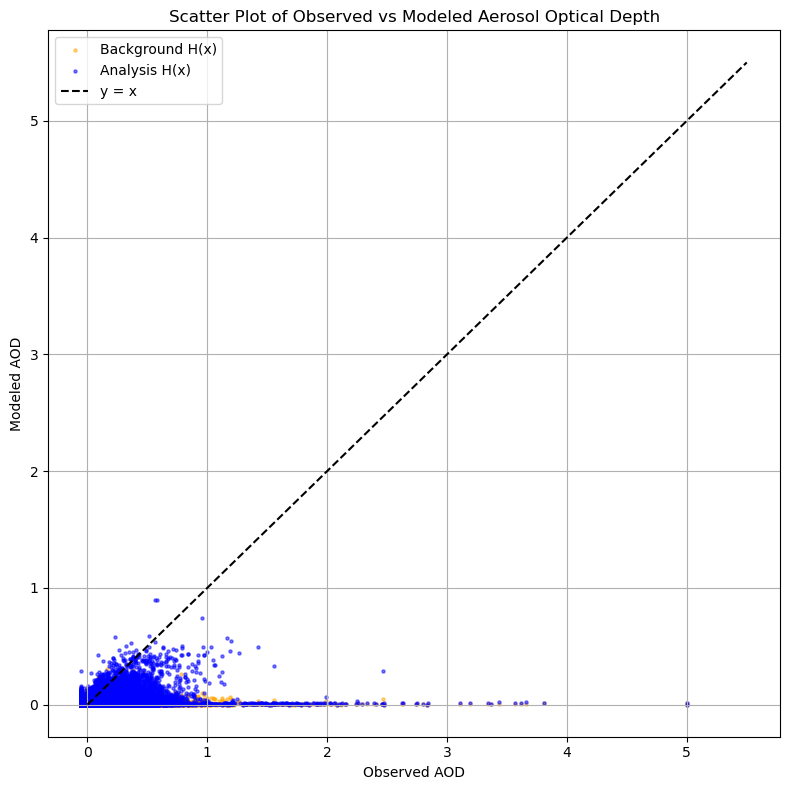

In [32]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

file = "diag_viirs_npp_aod_2023093018.nc"

# Load variables
obs = xr.open_dataset(file, group="ObsValue")['aerosolOpticalDepth']
hofx_bg = xr.open_dataset(file, group="hofx0")['aerosolOpticalDepth']  # background
hofx_an = xr.open_dataset(file, group="hofx1")['aerosolOpticalDepth']  # analysis

fill_obs = obs.encoding.get('_FillValue', -3.368795e+38)
fill_hofx_bg = hofx_bg.encoding.get('_FillValue', -3.368795e+38)
fill_hofx_an = hofx_an.encoding.get('_FillValue', -3.368795e+38)

# Valid mask for all three
valid = (obs[:, 0] != fill_obs) & (hofx_bg[:, 0] != fill_hofx_bg) & (hofx_an[:, 0] != fill_hofx_an)

obs_vals = obs.values[valid, 0]
hofx_bg_vals = hofx_bg.values[valid, 0]
hofx_an_vals = hofx_an.values[valid, 0]

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(obs_vals, hofx_bg_vals, s=5, alpha=0.5, label='Background H(x)', color='orange')
plt.scatter(obs_vals, hofx_an_vals, s=5, alpha=0.5, label='Analysis H(x)', color='blue')

# Diagonal line y=x for reference
lims = [0, max(obs_vals.max(), hofx_bg_vals.max(), hofx_an_vals.max()) * 1.1]
plt.plot(lims, lims, 'k--', label='y = x')

plt.xlabel('Observed AOD')
plt.ylabel('Modeled AOD')
plt.title('Scatter Plot of Observed vs Modeled Aerosol Optical Depth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('./scatter.png')
plt.show()

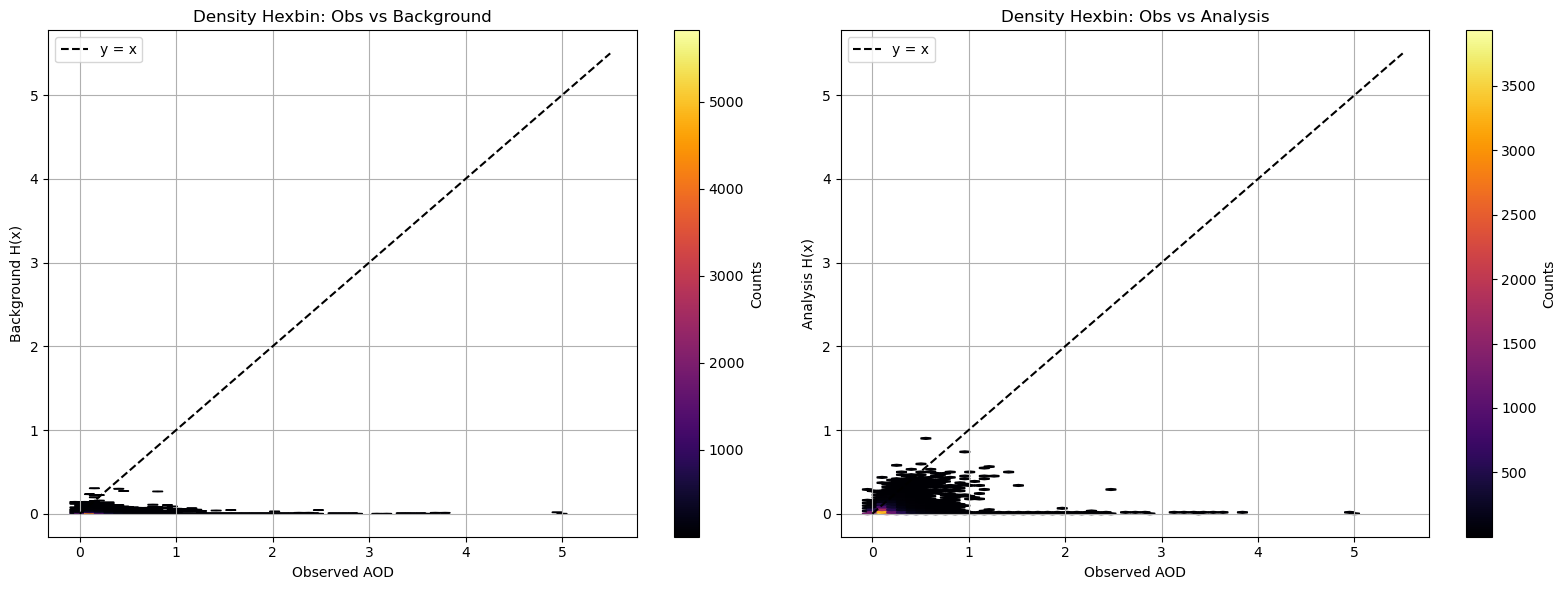

In [31]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

file = "diag_viirs_npp_aod_2023093018.nc"

# Load variables
obs = xr.open_dataset(file, group="ObsValue")['aerosolOpticalDepth']
hofx_bg = xr.open_dataset(file, group="hofx0")['aerosolOpticalDepth']  # background
hofx_an = xr.open_dataset(file, group="hofx1")['aerosolOpticalDepth']  # analysis

fill_obs = obs.encoding.get('_FillValue', -3.368795e+38)
fill_hofx_bg = hofx_bg.encoding.get('_FillValue', -3.368795e+38)
fill_hofx_an = hofx_an.encoding.get('_FillValue', -3.368795e+38)

# Valid mask for all three
valid = (obs[:, 0] != fill_obs) & (hofx_bg[:, 0] != fill_hofx_bg) & (hofx_an[:, 0] != fill_hofx_an)

obs_vals = obs.values[valid, 0]
hofx_bg_vals = hofx_bg.values[valid, 0]
hofx_an_vals = hofx_an.values[valid, 0]

lims = [0, max(obs_vals.max(), hofx_bg_vals.max(), hofx_an_vals.max()) * 1.1]

plt.figure(figsize=(16, 6))

# Background hexbin
plt.subplot(1, 2, 1)
hb = plt.hexbin(obs_vals, hofx_bg_vals, gridsize=50, cmap='inferno', mincnt=1)
plt.plot(lims, lims, 'k--', label='y = x')
plt.xlabel('Observed AOD')
plt.ylabel('Background H(x)')
plt.title('Density Hexbin: Obs vs Background')
plt.colorbar(hb, label='Counts')
plt.legend()
plt.grid(True)

# Analysis hexbin
plt.subplot(1, 2, 2)
hb2 = plt.hexbin(obs_vals, hofx_an_vals, gridsize=50, cmap='inferno', mincnt=1)
plt.plot(lims, lims, 'k--', label='y = x')
plt.xlabel('Observed AOD')
plt.ylabel('Analysis H(x)')
plt.title('Density Hexbin: Obs vs Analysis')
plt.colorbar(hb2, label='Counts')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()